# Problem 1: Tensorflow Random Walks


We implement the numpy Random Walks code from the ubsuny/CompPhys repository in 1D, 2D, and 3D.  We also rewrite the code to use tensorflow functions instead of numpy.  For each dimension, we plot $\langle | x_n |^2 \rangle$ and calculate the diffusion coefficient (or constant).  We compare the diffusion coefficients calculated in the numpy and tensorflow methods.

The diffusion coefficient is calculated using the equation,

$$
\sigma_n^2 = 2Dn
$$
where,
$$
\sigma_n^2 = \sqrt{  \left< x_n^4 \right> - \left< x_n^2\right>^2 },
$$ 
is the diffusion width at the $n^{th}$ step and D is the diffusion coefficient.  In 1D, with $m$ walkers, the equations for $\left< x_n^4 \right>$ and $\left< x_n^2\right>^2$ are,
$$
\begin{aligned}
\left< x_n^2 \right> &= \sum_{k=1}^m \frac{x_{k,n}^2}{m}, \; and \\
\left< x_n^4 \right> &= \sum_{k=1}^m \frac{x_{k,n}^4}{m}.
\end{aligned}
$$ 

For 2D and 3D, instead of using $\langle x_n^2 \rangle$ and $\langle x_n^4 \rangle$, we use,

$$
\begin{aligned}
\left< r_n^2 \right> &= \sum_{i=1}^{dims} \sum_{k=1}^m \frac{u_{k,i,n}^2}{m}, \; and \\
\left< r_n^4 \right> &= \sum_{i=1}^{dims} \sum_{k=1}^m \frac{u_{k,i,n}^4}{m}.
\end{aligned}
$$ 

where $u_{k,i,n}$ is walker $k$'s position at step $n$ in dimension $i$.  Therefore, for 2 dimensions, we calculate the diffusion coefficient using the equations,
$$
\begin{aligned}
\sigma_n^2 &= \sigma_{n,1}^2 + \sigma_{n,2}^2, \\
&= 2Dn + 2Dn, \\
&= 4Dn,
\end{aligned}
$$

and for 3 dimensions we use,
$$
\begin{aligned}
\sigma_n^2 &= \sigma_{n,1}^2 + \sigma_{n,2}^2 + \sigma_{n,3}^2, \\
&= 2Dn + 2Dn + 2Dn, \\
&= 6Dn. \\
\end{aligned}
$$

Because $\sigma_n^2$ is a linear function of $n$, we can plot $\sigma_n^2$ vs. $n$ and calculate $D$ from the slope of a best fit line.




**Tensorflow resources:**

https://www.tensorflow.org/guide/random_numbers?hl=hr#setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

plt.rcParams['figure.figsize'] = [8.0, 6.0]
plt.rcParams['figure.dpi'] = 100

## Numpy Method

In this method, taken from the ubsuny/CompPhys repository, the random selector is the numpy function *np.random.choice()*.

In [2]:
plot_num=1

In [3]:
n_walkers = 250
n_steps = 5000
t = np.arange(n_steps)

In [4]:
# Walkers can go in + direction, - direction, or stay still
step_set = [-1, 0, 1]

### 1D

In [5]:
# The shape is for "n_walkers" taking "n_steps" in "dims" dimensions.
# So, in 1d if there are 10 walkers making 100 steps each,
# it will be (10, 100, 1)
step_shape_1d = (n_walkers,n_steps,1)
# These are the steps at each stage
start_time_1d_np = time.time()
steps_1d = np.random.choice(a=step_set, size=step_shape_1d)
time_1d_np = time.time() - start_time_1d_np

# Now we add up the steps for each walker to get the x positions
x_1d = steps_1d.cumsum(axis=1)

# Now get the averages over the walkers
x2_1d = np.average( x_1d**2, axis=0 )
x4_1d = np.average( x_1d**4, axis=0 )
sigma2_nd_1d = np.sqrt( x4_1d - x2_1d**2 )
sigma2_1d = np.sum( sigma2_nd_1d, axis=1 )

Text(0, 0.5, 'x position')

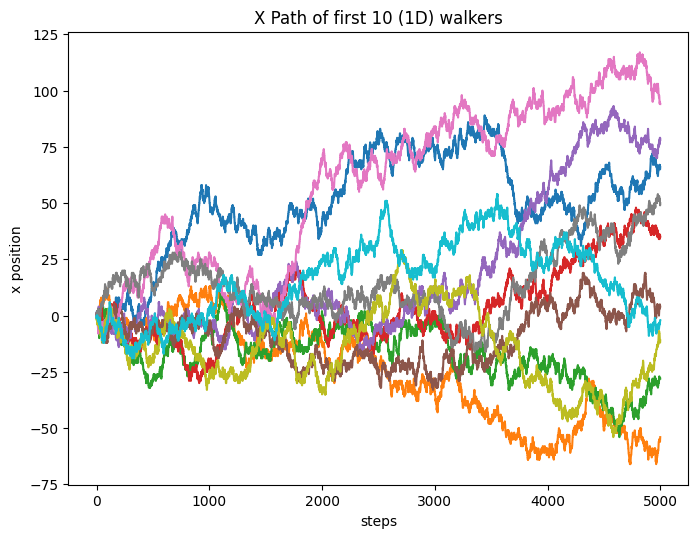

In [6]:
plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(10,n_walkers) ):
    plt.plot( x_1d[i,:,0] )
plt.title("X Path of first 10 (1D) walkers")
plt.xlabel("steps")
plt.ylabel("x position")

### 2D

In [7]:
step_shape_2d = (n_walkers,n_steps,2)

start_time_2d_np = time.time()
steps_2d = np.random.choice(a=step_set, size=step_shape_2d)
time_2d_np = time.time() - start_time_2d_np

x_2d = steps_2d.cumsum(axis=1)

x2_2d = np.average( x_2d**2, axis=0 )
x4_2d = np.average( x_2d**4, axis=0 )
sigma2_nd_2d = np.sqrt( x4_2d - x2_2d**2 )
sigma2_2d = np.sum( sigma2_nd_2d, axis=1 )

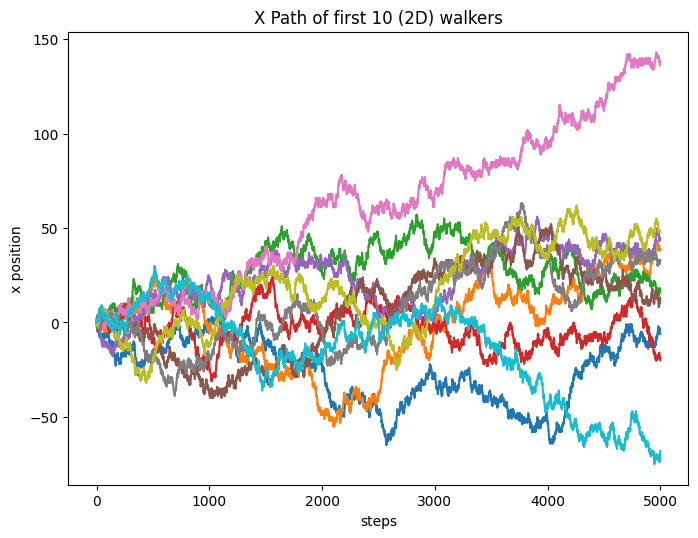

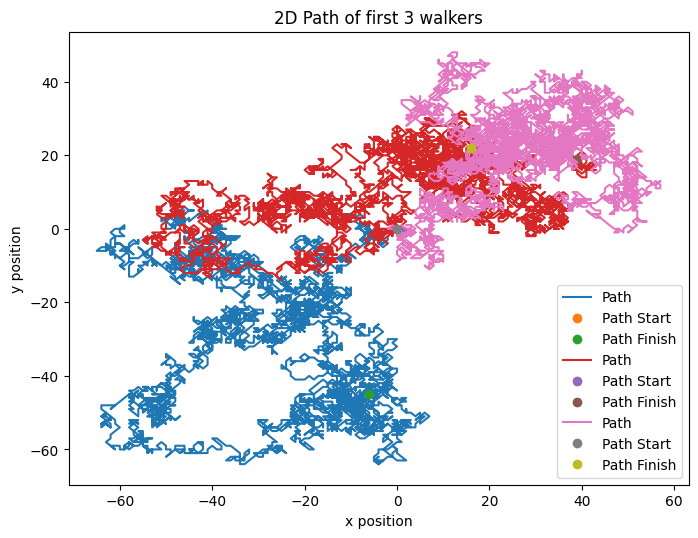

In [8]:
plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(10,n_walkers) ):
    plt.plot( x_2d[i,:,0] )
plt.title("X Path of first 10 (2D) walkers")
plt.xlabel("steps")
plt.ylabel("x position")

plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(3,n_walkers) ):
    plt.plot( x_2d[i,:,0], x_2d[i,:,1], '-', label='Path' )
    plt.plot( x_2d[i,0,0], x_2d[i,0,1], 'o', label='Path Start' )
    plt.plot( x_2d[i,n_steps-1,0], x_2d[i,n_steps-1,1], 'o', label='Path Finish')
plt.title("2D Path of first 3 walkers")
plt.xlabel("x position")
plt.ylabel("y position")
plt.legend()

### 3D

In [9]:
step_shape_3d = (n_walkers,n_steps,3)

start_time_3d_np = time.time()
steps_3d = np.random.choice(a=step_set, size=step_shape_3d)
time_3d_np = time.time() - start_time_3d_np

x_3d = steps_3d.cumsum(axis=1)

x2_3d = np.average( x_3d**2, axis=0 )
x4_3d = np.average( x_3d**4, axis=0 )
sigma2_nd_3d = np.sqrt( x4_3d - x2_3d**2 )
sigma2_3d = np.sum( sigma2_nd_3d, axis=1 )

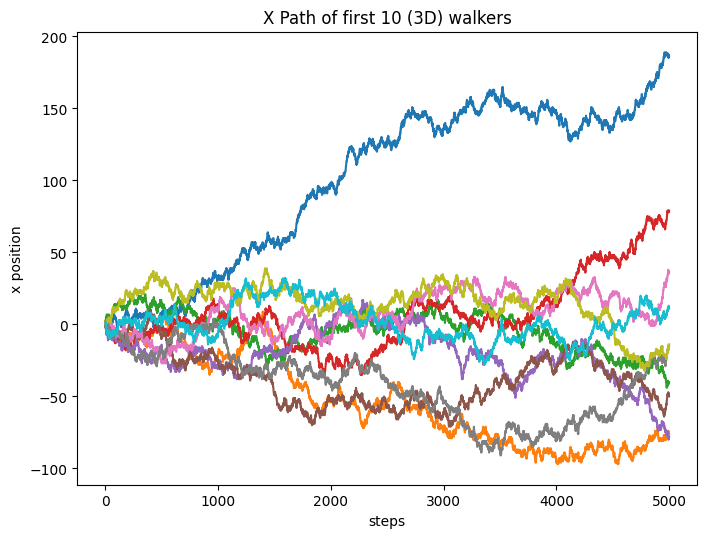

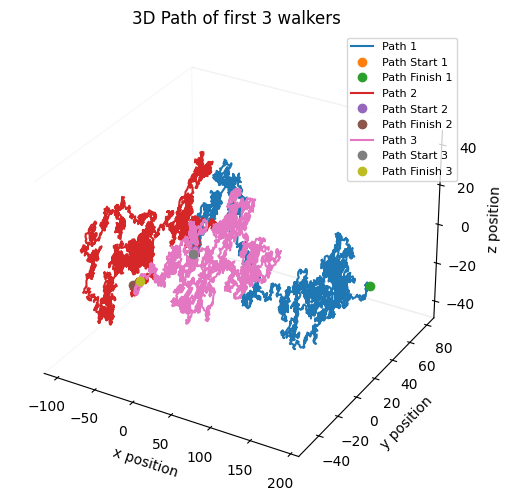

In [10]:
plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(10,n_walkers) ):
    plt.plot( x_3d[i,:,0] )
plt.title("X Path of first 10 (3D) walkers")
plt.xlabel("steps")
plt.ylabel("x position")

plt.figure(plot_num)
plot_num = plot_num + 1

ax = plt.axes(projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False

ax.set_xlabel("x position")
ax.set_ylabel("y position")
ax.set_zlabel("z position")

for i in range( min(3,n_walkers) ):
    ax.plot3D( x_3d[i,:,0], x_3d[i,:,1], x_3d[i,:,2], '-', label='Path %d' % (i+1) )
    ax.plot3D( x_3d[i,0,0], x_3d[i,0,1], x_3d[i,0,2], 'o', label='Path Start %d' % (i+1) )
    ax.plot3D( x_3d[i,n_steps-1,0], x_3d[i,n_steps-1,1], x_3d[i,n_steps-1,2], 'o', label='Path Finish %d' % (i+1))
plt.title("3D Path of first 3 walkers")
plt.legend(fontsize=8)

### Plot Statistics

*From Random Walkers notebook:*
Each walker has position

$$
x_n = \sum_{i=1}^n s_i
$$

where $s_i$ is each walkers' step from the `steps` construct above. The average of $s_i$ is zero because they are uniformly chosen from $(-1,0,1)$. However, the standard deviation for each walker is

$$
\left< x_n^2 \right> = \left< \sum_{i=1}^{n} \sum_{j=1}^{n} s_i s_j \right>
$$

$$
\left< x_n^2 \right> = \left< \sum_{i} s_i^2 \right> + \left< \sum_i \sum_{j \neq i} s_i s_j \right>
$$

If there are $m$ walkers each walking $n$ steps, and the index $k$ iterates over the walkers, then at each step $n$ we have ensemble averages (in 1 dimension):

$$
\left< x_n^4 \right> = \sum_{k=1}^m \frac{x_{k,n}^4}{m}
$$

$$
\left< x_n^2 \right> = \sum_{k=1}^m \frac{x_{k,n}^2}{m}
$$

The overall diffusion width at the $n$th step, taking these ensemble averages, is therefore

$$
\sigma^2_n = \sqrt{  \left< x_n^4 \right> - \left< x_n^2\right>^2 }
$$

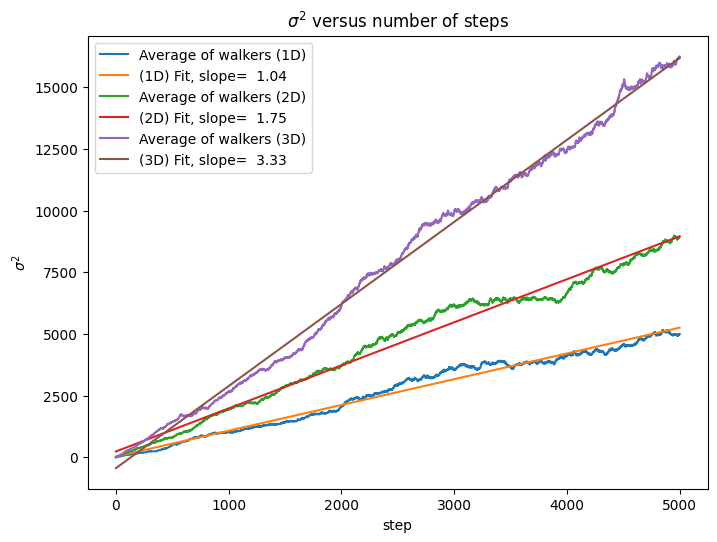

In [11]:
plt.figure(plot_num)
plot_num = plot_num + 1

plt.plot( sigma2_1d,  label='Average of walkers (1D)' )
res_1d = np.polyfit(t, sigma2_1d,1 )
plt.plot( t, res_1d[0]*t + res_1d[1], label='(1D) Fit, slope=%6.2f' % res_1d[0] )

plt.plot( sigma2_2d,  label='Average of walkers (2D)' )
res_2d = np.polyfit(t, sigma2_2d,1 )
plt.plot( t, res_2d[0]*t + res_2d[1], label='(2D) Fit, slope=%6.2f' % res_2d[0] )

plt.plot( sigma2_3d,  label='Average of walkers (3D)' )
res_3d = np.polyfit(t, sigma2_3d,1 )
plt.plot( t, res_3d[0]*t + res_3d[1], label='(3D) Fit, slope=%6.2f' % res_3d[0] )


plt.title(r"$\sigma^2$ versus number of steps")
plt.xlabel("step")
plt.ylabel(r"$\sigma^2$")
plt.legend()

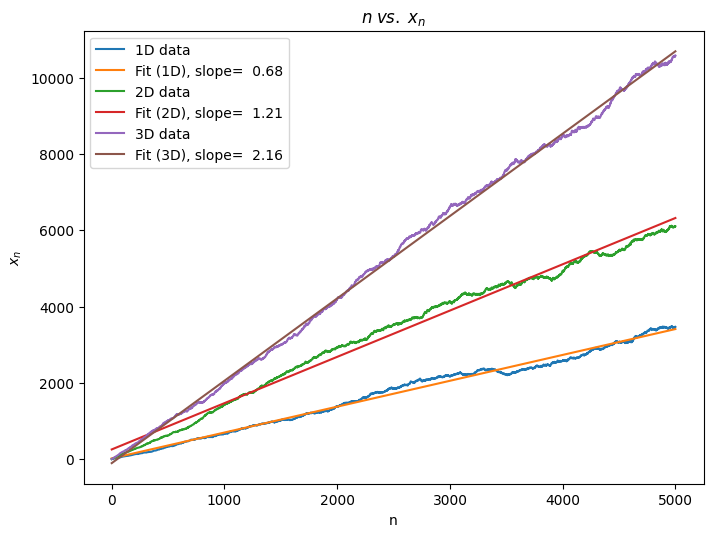

In [12]:
r2_1d = np.sum(x2_1d,1)
r2_2d = np.sum(x2_2d,1)
r2_3d = np.sum(x2_3d,1)

plt.figure(plot_num)
plot_num = plot_num + 1

plt.plot(r2_1d, label='1D data')
fit_1d = np.polyfit(t, r2_1d,1 )
plt.plot( t, fit_1d[0]*t + fit_1d[1], label='Fit (1D), slope=%6.2f' % (fit_1d[0]) )

plt.plot(r2_2d, label='2D data')
fit_2d = np.polyfit(t, r2_2d,1 )
plt.plot( t, fit_2d[0]*t + fit_2d[1], label='Fit (2D), slope=%6.2f' % (fit_2d[0]) )

plt.plot(r2_3d, label='3D data')
fit_3d = np.polyfit(t, r2_3d,1 )
plt.plot( t, fit_3d[0]*t + fit_3d[1], label='Fit (3D), slope=%6.2f' % (fit_3d[0]) )

plt.xlabel("n")
plt.ylabel("$x_n$")
plt.title("$n \; vs. \; x_n$")
plt.legend()

### Calculate Diffusion Coefficiants

In [13]:
D_numpy_1d = res_1d[0]/2
D_numpy_2d = res_2d[0]/4
D_numpy_3d = res_3d[0]/6

Df_numpy_1d = fit_1d[0]/2
Df_numpy_2d = fit_2d[0]/4
Df_numpy_3d = fit_3d[0]/6

## Tensorflow Method

In tensorflow, the function *tensorflow.random.stateless_uniform()* is used to select the next step.  *tensorflow.random.stateless_uniform()* outputs deterministic pseudorandom values from a uniform distribution [[1]](https://www.tensorflow.org/api_docs/python/tf/random/stateless_uniform).

In [14]:
import tensorflow as tf

tf.random.set_seed(0)

In [15]:
n_walkers_tf = 250
n_steps_tf = 5000

t_tf = np.arange(n_steps_tf)

### 1D

In [16]:
step_shape_tf_1d = (n_walkers_tf, n_steps_tf, 1)

start_time_1d_tf = time.time()
#steps_tf_1d = tf.random.stateless_uniform(shape=step_shape_tf_1d, minval=-1,maxval=2, seed=(2,3) , dtype=tf.int32)
steps_tf_1d = tf.random.uniform(shape=step_shape_tf_1d, minval=-1,maxval=2, seed=0 , dtype=tf.int32)
time_1d_tf = time.time() - start_time_1d_tf

x_tf_1d = tf.math.cumsum(steps_tf_1d, axis=1)

# Now get the averages over the walkers
x2_tf_1d = tf.math.reduce_mean( x_tf_1d**2, axis=0 )
x4_tf_1d = tf.math.reduce_mean( x_tf_1d**4, axis=0 )

r2_tf_1d = x2_tf_1d[:,0]
r4_tf_1d = x4_tf_1d[:,0]

sigma2_nd_tf_1d = tf.math.sqrt( tf.cast(x4_tf_1d, dtype=tf.float32) - tf.cast(x2_tf_1d, dtype=tf.float32)**2 )
sigma2_tf_1d = tf.reduce_sum(sigma2_nd_tf_1d, axis=1 )

Text(0, 0.5, 'x position')

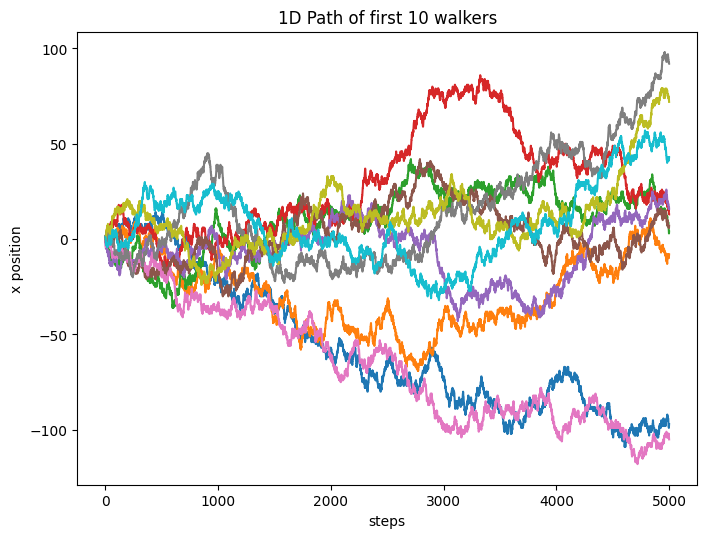

In [17]:
plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(10,n_walkers_tf) ):
    plt.plot( x_tf_1d[i,:,0] )
plt.title("1D Path of first 10 walkers")
plt.xlabel("steps")
plt.ylabel("x position")

### 2D

In [18]:
step_shape_tf_2d = (n_walkers_tf, n_steps_tf, 2)

start_time_2d_tf = time.time()
#steps_tf_2d = tf.random.stateless_uniform(shape=step_shape_tf_2d, minval=-1,maxval=2, seed=(2,3), dtype=tf.int32)
steps_tf_2d = tf.random.uniform(shape=step_shape_tf_2d, minval=-1,maxval=2, seed=0, dtype=tf.int32)
time_2d_tf = time.time() - start_time_2d_tf

x_tf_2d = tf.math.cumsum(steps_tf_2d, axis=1)

# Now get the averages over the walkers
x2_tf_2d = tf.math.reduce_mean( x_tf_2d**2, axis=0 )
x4_tf_2d = tf.math.reduce_mean( x_tf_2d**4, axis=0 )

r2_tf_2d = x2_tf_2d[:,0] + x2_tf_2d[:,1]
r4_tf_2d = x4_tf_2d[:,0] + x4_tf_2d[:,1]

sigma2_nd_tf_2d = tf.math.sqrt( tf.cast(x4_tf_2d, dtype=tf.float32) - tf.cast(x2_tf_2d, dtype=tf.float32)**2 )
sigma2_tf_2d = tf.math.reduce_sum(sigma2_nd_tf_2d, axis=1 )

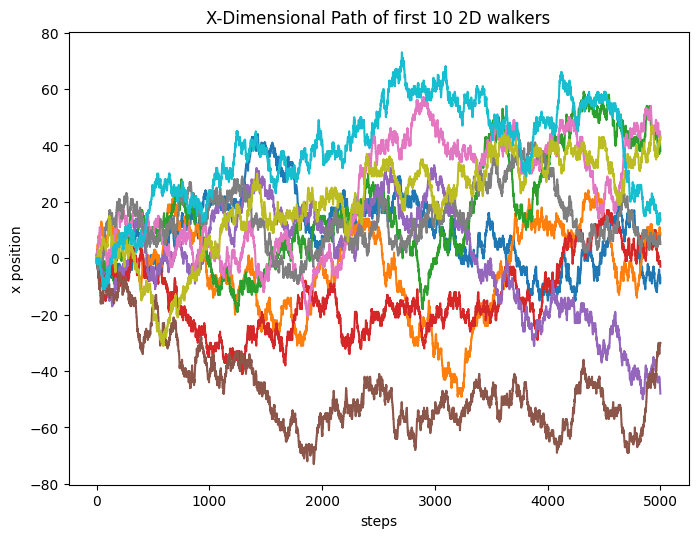

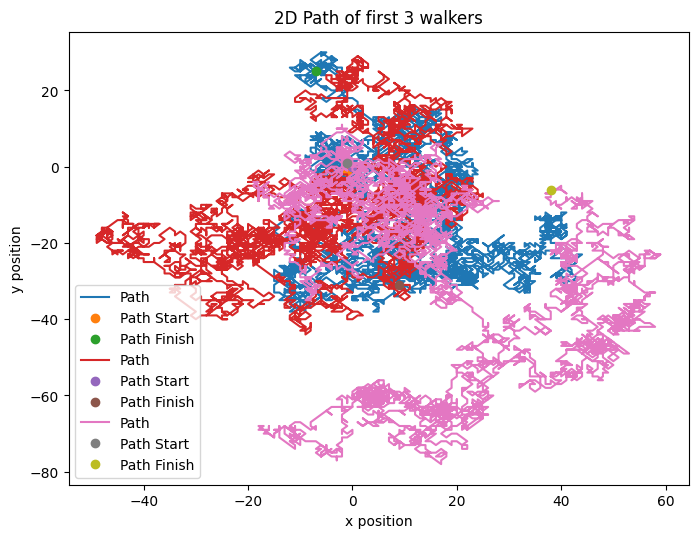

In [19]:
plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(10,n_walkers_tf) ):
    plt.plot( x_tf_2d[i,:,0] )
plt.title("X-Dimensional Path of first 10 2D walkers")
plt.xlabel("steps")
plt.ylabel("x position")

plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(3,n_walkers_tf) ):
    plt.plot( x_tf_2d[i,:,0], x_tf_2d[i,:,1], '-', label='Path' )
    plt.plot( x_tf_2d[i,0,0], x_tf_2d[i,0,1], 'o', label='Path Start' )
    plt.plot( x_tf_2d[i,n_steps-1,0], x_tf_2d[i,n_steps-1,1], 'o', label='Path Finish')
plt.title("2D Path of first 3 walkers")
plt.xlabel("x position")
plt.ylabel("y position")
plt.legend()

### 3D

In [20]:
step_shape_tf_3d = (n_walkers_tf, n_steps_tf, 3)

start_time_3d_tf = time.time()
#steps_tf_3d = tf.random.stateless_uniform(shape=step_shape_tf_3d, minval=-1,maxval=2, seed=(2,3), dtype=tf.int32)
steps_tf_3d = tf.random.uniform(shape=step_shape_tf_3d, minval=-1,maxval=2, seed=0, dtype=tf.int32)
time_3d_tf = time.time() - start_time_3d_tf

x_tf_3d = tf.math.cumsum(steps_tf_3d, axis=1)

# Now get the averages over the walkers
x2_tf_3d = tf.math.reduce_mean( x_tf_3d**2, axis=0 )
x4_tf_3d = tf.math.reduce_mean( x_tf_3d**4, axis=0 )

r2_tf_3d = x2_tf_3d[:,0] + x2_tf_3d[:,1] + x2_tf_3d[:,2]
r4_tf_3d = x4_tf_3d[:,0] + x4_tf_3d[:,1] + x2_tf_3d[:,2]

sigma2_nd_tf_3d = tf.math.sqrt( tf.cast(x4_tf_3d, dtype=tf.float32) - tf.cast(x2_tf_3d, dtype=tf.float32)**2 )
sigma2_tf_3d = tf.math.reduce_sum(sigma2_nd_tf_3d, axis=1 )

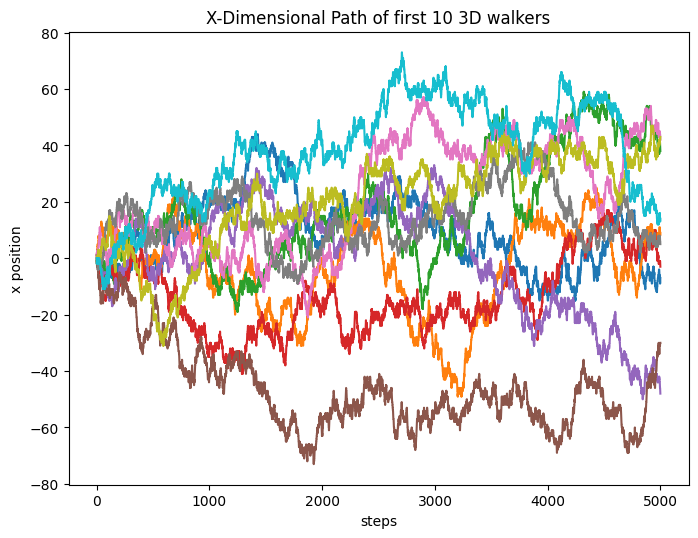

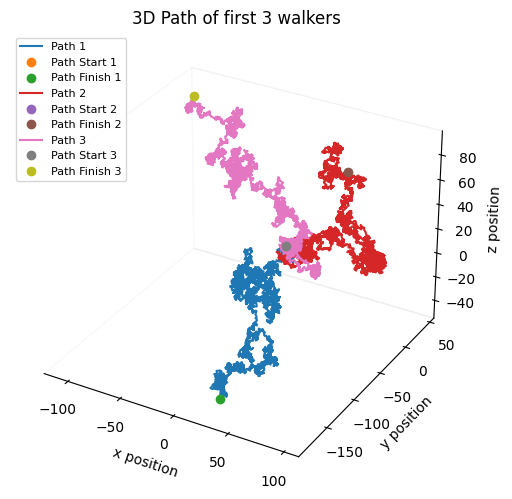

In [21]:
plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(10,n_walkers_tf) ):
    plt.plot( x_tf_2d[i,:,0] )
plt.title("X-Dimensional Path of first 10 3D walkers")
plt.xlabel("steps")
plt.ylabel("x position")

plt.figure(plot_num)
plot_num = plot_num + 1

ax = plt.axes(projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False

ax.set_xlabel("x position")
ax.set_ylabel("y position")
ax.set_zlabel("z position")

for i in range( min(3,n_walkers_tf) ):
    ax.plot3D( x_tf_3d[i,:,0], x_tf_3d[i,:,1], x_tf_3d[i,:,2], '-', label='Path %d' % (i+1) )
    ax.plot3D( x_tf_3d[i,0,0], x_tf_3d[i,0,1], x_tf_3d[i,0,2], 'o', label='Path Start %d' % (i+1) )
    ax.plot3D( x_tf_3d[i,n_steps-1,0], x_tf_3d[i,n_steps-1,1], x_tf_3d[i,n_steps-1,2], 'o', label='Path Finish %d' % (i+1))
plt.title("3D Path of first 3 walkers")
plt.legend(fontsize=8)


### Statistical Plots

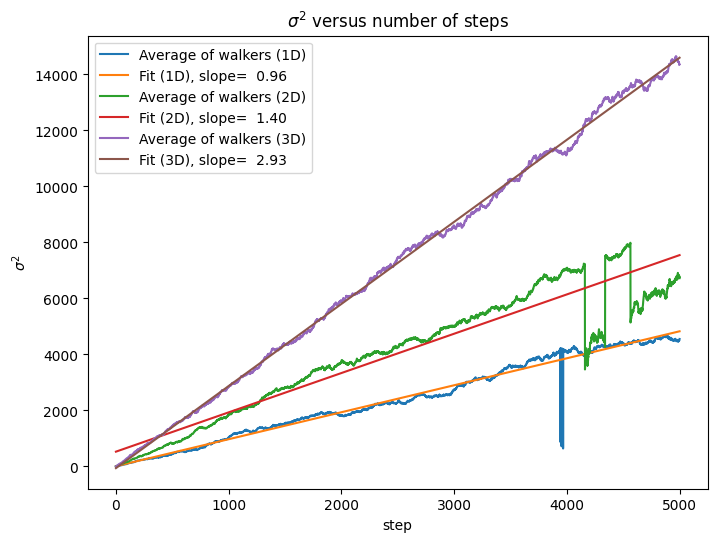

In [22]:
plt.figure(plot_num)
plot_num = plot_num + 1

plt.plot( sigma2_tf_1d,  label='Average of walkers (1D)' )
res_1d = np.polyfit(t_tf, sigma2_tf_1d,1 )
plt.plot( t_tf, res_1d[0]*t_tf + res_1d[1], label='Fit (1D), slope=%6.2f' % res_1d[0] )

plt.plot( sigma2_tf_2d,  label='Average of walkers (2D)' )
res_2d = np.polyfit(t_tf, sigma2_tf_2d,1 )
plt.plot( t_tf, res_2d[0]*t_tf + res_2d[1], label='Fit (2D), slope=%6.2f' % res_2d[0] )

plt.plot( sigma2_tf_3d,  label='Average of walkers (3D)' )
res_3d = np.polyfit(t_tf, sigma2_tf_3d,1 )
plt.plot( t_tf, res_3d[0]*t_tf + res_3d[1], label='Fit (3D), slope=%6.2f' % res_3d[0] )


plt.title(r"$\sigma^2$ versus number of steps")
plt.xlabel("step")
plt.ylabel(r"$\sigma^2$")
plt.legend()

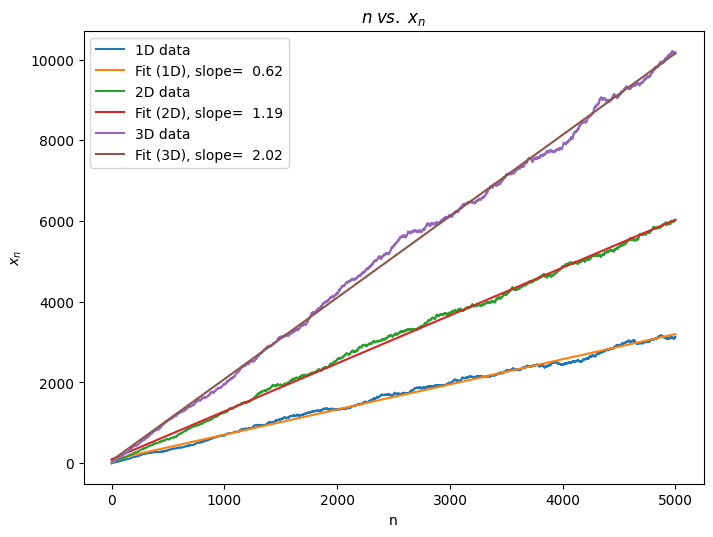

In [23]:
plt.figure(plot_num)
plot_num = plot_num + 1
plt.plot(x2_tf_1d, label='1D data')
fit_1d = np.polyfit(t_tf, x2_tf_1d,1 )
plt.plot( t_tf, fit_1d[0]*t_tf + fit_1d[1], label='Fit (1D), slope=%6.2f' % fit_1d[0] )

plt.plot(r2_tf_2d, label='2D data')
fit_2d = np.polyfit(t_tf, r2_tf_2d,1 )
plt.plot( t_tf, fit_2d[0]*t_tf + fit_2d[1], label='Fit (2D), slope=%6.2f' % fit_2d[0] )

plt.plot(r2_tf_3d, label='3D data')
fit_3d = np.polyfit(t_tf, r2_tf_3d,1 )
plt.plot( t_tf, fit_3d[0]*t_tf + fit_3d[1], label='Fit (3D), slope=%6.2f' % fit_3d[0] )

plt.xlabel("n")
plt.ylabel("$x_n$")
plt.title("$n \; vs. \; x_n$")
plt.legend()

### Calculate Diffusion Coefficients

In [24]:
D_tf_1d = res_1d[0]/2
D_tf_2d = res_2d[0]/4
D_tf_3d = res_3d[0]/6

In [25]:
err_tf_1d = abs((D_tf_1d - 0.5)/0.5)
err_tf_2d = abs((D_tf_2d - 0.5)/0.5)
err_tf_3d = abs((D_tf_3d - 0.5)/0.5)

err_np_1d = abs((D_numpy_1d - 0.5)/0.5)
err_np_2d = abs((D_numpy_2d - 0.5)/0.5)
err_np_3d = abs((D_numpy_3d - 0.5)/0.5)

err_tf = (err_tf_1d+err_tf_2d+err_tf_3d)/3
err_np = (err_np_1d+err_np_2d+err_np_3d)/3

## Compare Diffusion Coefficient Results

In [27]:
print("dim||Numpy\t|Error\t|Time [ms]\t||Tensorflow\t|Error\t|Time [ms]")
print("_____________________________________________________________________________")
print("1D ||%0.3f\t|%0.3f\t|%4.2f\t\t||%0.3f\t\t|%0.3f\t|%4.2f" % (D_numpy_1d, err_np_1d, time_1d_np*1000, D_tf_1d, err_tf_1d, time_1d_tf*1000))
print("2D ||%0.3f\t|%0.3f\t|%4.2f\t\t||%0.3f\t\t|%0.3f\t|%4.2f" % (D_numpy_2d, err_np_2d, time_2d_np*1000, D_tf_2d, err_tf_2d, time_2d_tf*1000))
print("3D ||%0.3f\t|%0.3f\t|%4.2f\t\t||%0.3f\t\t|%0.3f\t|%4.2f" % (D_numpy_3d, err_np_3d, time_3d_np*1000, D_tf_3d, err_tf_3d, time_3d_tf*1000))
print("       avg. err: %0.3f\t\t\t       avg. err: %0.3f" % (err_np, err_tf))

dim||Numpy	|Error	|Time [ms]	||Tensorflow	|Error	|Time [ms]
_____________________________________________________________________________
1D ||0.522	|0.044	|41.63		||0.482		|0.036	|3294.80
2D ||0.436	|0.127	|77.00		||0.351		|0.298	|7.86
3D ||0.554	|0.109	|116.33		||0.489		|0.022	|8.44
       avg. err: 0.093			       avg. err: 0.119


### Comments

We expect the value of the diffusion coefficient to be $\frac{1}{2}$.  The results are somewhat inconsistent between each run but, on average, the error for the tensorflow method is higher than the numpy method.  One thing to note is that the tensorflow method failed due to an apparent overworking of the NVIDIA Jetson for any $n_{walkers} > 250$.  Each random selector function was also timed and the results are displayed in the table above.  For 2D and 3D, tensorflow is consistenly faster but for 1D, the time to run the tensorflow selector is considerably longer than any other method.  It is unclear why the 1D case behaves so differently for tensorflow.